
# <a name="0">ML model for Dining Restaurant</a>
1. <a href="#1">Import required libraries</a>
1. <a href="#2">Read the Dataset</a>
2. <a href="#3">Data preparation</a>
4. <a href="#4">Training Dataset</a>
3. <a href="#5">Evaluate on Test set</a>




## 1. <a name="1">Import required libraries</a>
<a href="#0">Go to top</a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier

from joblib import dump,load

## 2. <a name="2">Read the dataset</a>
(<a href="#0">Go to top</a>)

In [49]:
df=pd.read_csv('./df_undivided_prepared.csv')


## 3. <a name="3">Data preparation</a>
(<a href="#0">Go to top</a>)

In [50]:
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [24]:
categorical_columns = X.select_dtypes(include="object").columns.tolist()
categorical_columns

['Gender', 'Customer Type', 'Type of Dining', 'Ambiance']

In [22]:
selected_features = X.columns[X.nunique() > 6].tolist()
selected_features

['Age', 'Distance from Home', 'Wait Time for a Table']

<!-- ColumnTransformer
This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space

transformers list of tuples
List of (name, transformer, columns) tuples specifying the transformer objects to be applied to subsets of the data.


transformer{‘drop’, ‘passthrough’} or estimator
Estimator must support fit and transform. Special-cased strings ‘drop’ and ‘passthrough’ are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.

------
 ColumnTransformer will be applied to the features specified in X_train. However, when you use the fit() method of the pipeline (pipeline.fit(X_train, y_train)), it looks at the entire dataset (X_train) to learn the transformations and fit the model.

Here's a breakdown of the typical process when using a pipeline with a ColumnTransformer:

Column Transformation (preprocessor):

The fit_transform method of the preprocessor is called on X_train, which includes only the training features.
The transformer learns the scaling and encoding parameters based on the training data.
Model Fitting:

The transformed features are then used to fit the machine learning model (RandomForestClassifier in your case).
The model is trained using the transformed training features and the corresponding target variable (y_train).
Prediction or Evaluation:

The pipeline can then be used for prediction on new data or evaluation on test data.
The preprocessor you defined in the ColumnTransformer will be applied to the features specified in X_train. However, when you use the fit() method of the pipeline (pipeline.fit(X_train, y_train)), it looks at the entire dataset (X_train) to learn the transformations and fit the model.

Here's a breakdown of the typical process when using a pipeline with a ColumnTransformer:

Column Transformation (preprocessor):

The fit_transform method of the preprocessor is called on X_train, which includes only the training features.
The transformer learns the scaling and encoding parameters based on the training data.
Model Fitting:

The transformed features are then used to fit the machine learning model (RandomForestClassifier in your case).
The model is trained using the transformed training features and the corresponding target variable (y_train).
Prediction or Evaluation:

The pipeline can then be used for prediction on new data or evaluation on test data.-->

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('Robust', RobustScaler(), selected_features),
        ('OHE', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    ], remainder='passthrough'
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('Robust', RobustScaler(),
                                 ['Age', 'Distance from Home',
                                  'Wait Time for a Table']),
                                ('OHE', OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Customer Type', 'Type of Dining',
                                  'Ambiance'])])

## 4. <a name="4">Training Dataset </a>
(<a href="#0">Go to top</a>)


In [62]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [52]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))  # Replace with your model
])

In [64]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Robust', RobustScaler(),
                                                  ['Age', 'Distance from Home',
                                                   'Wait Time for a Table']),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Dining',
                                                   'Ambiance'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [91]:
print(f"Train Score: {pipeline.score(X_train, y_train)}")
print(f"Validation Score: {pipeline.score(X_val, y_val)}")

Train Score: 1.0
Validation Score: 0.9600400369571912


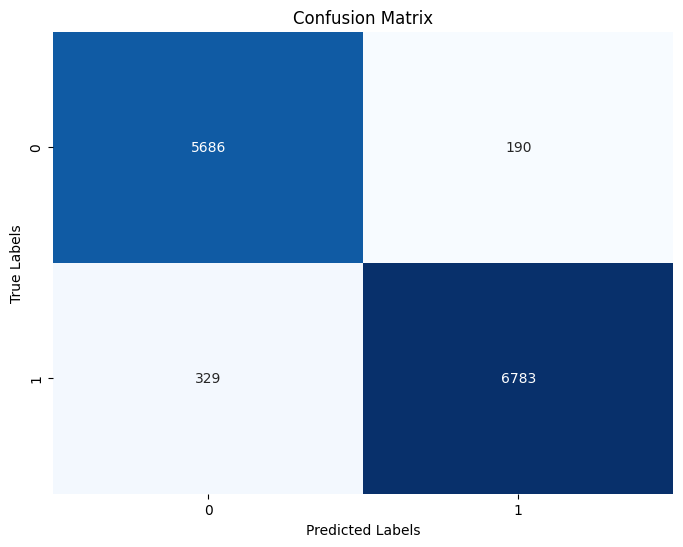

In [97]:
y_pred = pipeline.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [67]:
pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('model',XGBClassifier(n_jobs=-1,reg_lambda=1.7,reg_alpha=1.2))  # Replace with your model
])


In [68]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Robust', RobustScaler(),
                                                  ['Age', 'Distance from Home',
                                                   'Wait Time for a Table']),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Dining',
                                                   'Ambiance'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=No...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, random_state=None, ...))])

In [92]:
print(f"Train Score: {pipeline2.score(X_train, y_train)}")
print(f"Validation Score: {pipeline2.score(X_val, y_val)}")

Train Score: 0.9688943640283338
Validation Score: 0.95903911302741


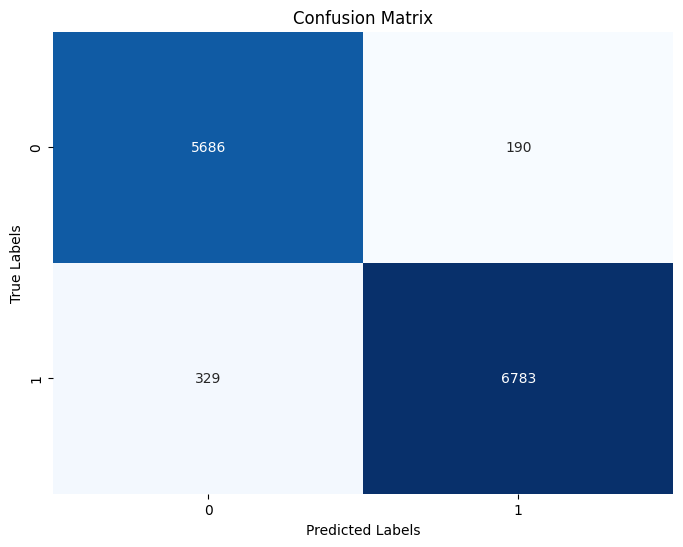

In [98]:
y_pred = pipeline.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [71]:
pipeline3 = Pipeline([
    ('preprocessor', preprocessor),
    ('model',AdaBoostClassifier(n_estimators=100, random_state=0))  # Replace with your model
])


In [72]:
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Robust', RobustScaler(),
                                                  ['Age', 'Distance from Home',
                                                   'Wait Time for a Table']),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Dining',
                                                   'Ambiance'])])),
                ('model',
                 AdaBoostClassifier(n_estimators=100, random_state=0))])

In [99]:
print(f"Train Score: {pipeline3.score(X_train, y_train)}")
print(f"Validation Score: {pipeline3.score(X_val, y_val)}")

Train Score: 0.9021981829380967
Validation Score: 0.9041422851863259


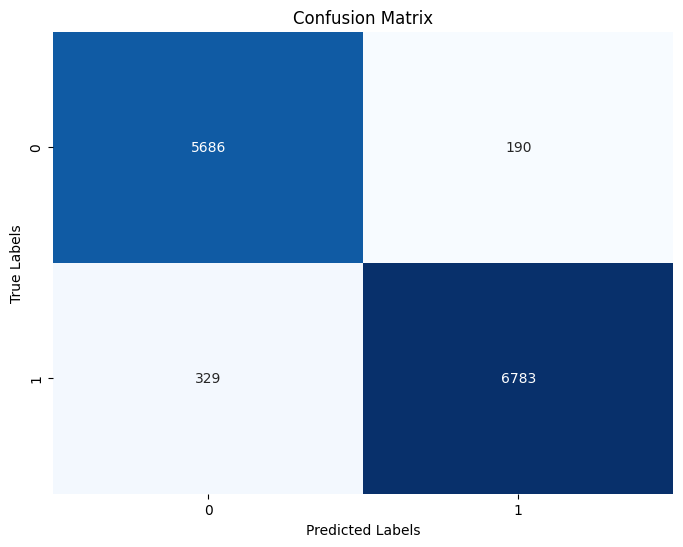

In [100]:
y_pred = pipeline.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## 5. <a name="5">Evaluate on Test set</a>
(<a href="#0">Go to top</a>)


In [101]:
print(f"RandomForestClassifier Test Score: {pipeline.score(X_test, y_test)}")
print(f"XGBClassifier Test Score: {pipeline2.score(X_test, y_test)}")
print(f"AdaBoostClassifier Test Score: {pipeline3.score(X_test, y_test)}")

RandomForestClassifier Test Score: 0.9585771481367416
XGBClassifier Test Score: 0.9604250076994149
AdaBoostClassifier Test Score: 0.9036033261472128


###  

In [85]:
dump(label_encoder, 'label_encoder_y.joblib')

['label_encoder_y.joblib']

In [84]:
dump(pipeline2, 'XG_boost_pipeline.joblib')

['XG_boost_pipeline.joblib']

In [109]:
df0=df.loc[0].to_frame().T

In [110]:
df0

,satisfaction,Gender,Customer Type,Age,Type of Dining,Ambiance,Distance from Home,Table Comfort,Reservation Convenience,Food and Drink Quality,...,Entertainment Options,Online support,Ease of Online booking,Table Service,Space Between Tables,Baggage handling,Checkin service,Cleanliness,Online Menu Access,Wait Time for a Table
0,satisfied,Female,Loyal Customer,65,Personal,Eco,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0


In [111]:
featuers = df0.drop("satisfaction", axis=1)
label = df0["satisfaction"]

In [112]:
XG_boost_pipeline = load('XG_boost_pipeline.joblib')
loaded_label_encoder = load('label_encoder_y.joblib')

In [113]:
y_pred_encoded = XG_boost_pipeline.predict(featuers)
y_pred_original = loaded_label_encoder.inverse_transform(y_pred_encoded)

In [115]:
y_pred_original[0] , label[0]

('satisfied', 'satisfied')